# node2vec Tutorial
- https://snap.stanford.edu/node2vec/
- pythonの実装もあるが，グラフが大規模になると遅すぎるので，C++実装がよい：　
    - https://github.com/snap-stanford/snap/tree/master/examples/node2vec

## ライブラリのダウンロード
- githubから落としてくる
    - git clone https://github.com/snap-stanford/snap
    - この中の，snap/examples/node2vec/に移動
- GCCでコンパイル, windowsだとvisual studio もしくは，Cygwin
    - LinuxやMacとかなら，makefileがあるので，そのまま，make all
    - すれば，node2vecの実行ファイルができる

## karate clubのデータで見てみる
- ダウンロードしたファイルに含まれているので,graph/karate.edgelist
-  海外のとある大学の空手クラブで，パートタイムインストラクターと主将が経営問題を巡って対立し，２つに分裂した. その際の，クラブの中心メンバー３４人の交友関係を表したグラフになっている． (1と34がインストラクターと主将に対応)

NodeView(('1', '32', '22', '20', '18', '14', '13', '12', '11', '9', '8', '7', '6', '5', '4', '3', '2', '31', '10', '33', '29', '28', '17', '34', '15', '16', '19', '21', '23', '24', '30', '26', '25', '27'))

# of nodes:  34
# of edges:  77


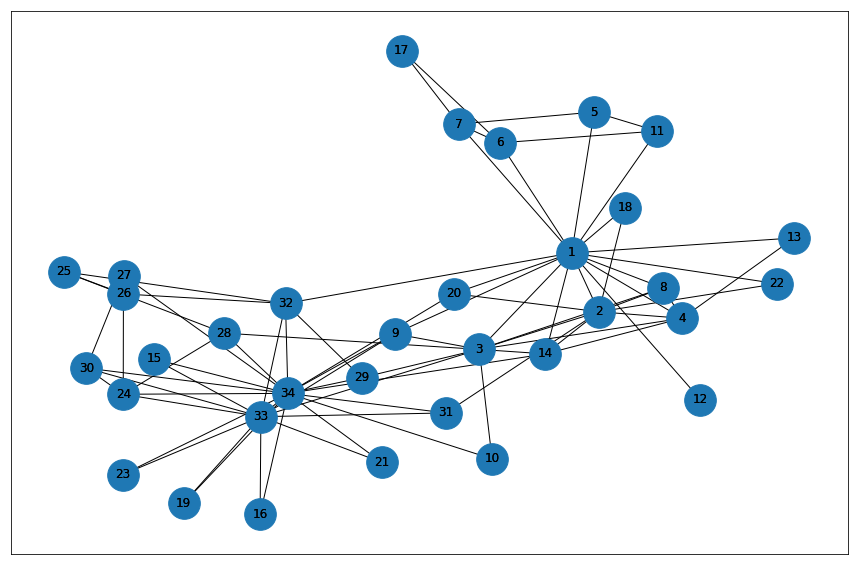

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.read_edgelist('graph/karate.edgelist')
display(G.nodes())
print('# of nodes: ', nx.number_of_nodes(G))
print('# of edges: ', nx.number_of_edges(G))

# 可視化
plt.figure(figsize=(15,10))
pos=nx.spring_layout(G, k=0.5)  # バネモデルで可視化, kはノード間の反発力を調整，　大きいほど離れる
nx.draw_networkx(G, pos, random_state=84)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_labels(G, pos)
plt.show()

In [2]:
G.nodes

NodeView(('1', '32', '22', '20', '18', '14', '13', '12', '11', '9', '8', '7', '6', '5', '4', '3', '2', '31', '10', '33', '29', '28', '17', '34', '15', '16', '19', '21', '23', '24', '30', '26', '25', '27'))

### node2vecを実行
- graphディレクトリにkarate.edgelistデータがサンプルとして入っているので実行
- parameters: 
    - Input graph path (-i:)
    - Output graph path (-o:)
    - Number of dimensions. Default is 128 (-d:)
    - Length of walk per source. Default is 80 (-l:)
    - Number of walks per source. Default is 10 (-r:)
    - Context size for optimization. Default is 10 (-k:)
    - Number of epochs in SGD. Default is 1 (-e:)
    - Return hyperparameter. Default is 1 (-p:)
    - Inout hyperparameter. Default is 1 (-q:)
    - Verbose output. (-v)
    - Graph is directed. (-dr)
    - Graph is weighted. (-w)
    - Output random walks instead of embeddings. (-ow)

In [3]:
!./node2vec -i:graph/karate.edgelist -o:emb/karate.emb -l:10 -r:30 -d:64 -p:1 -q:1 -v


An algorithmic framework for representational learning on graphs. [Mar  7 2019]
Input graph path (-i:)=graph/karate.edgelist
Output graph path (-o:)=emb/karate.emb
Number of dimensions. Default is 128 (-d:)=64
Length of walk per source. Default is 80 (-l:)=10
Number of walks per source. Default is 10 (-r:)=30
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=NO
Graph is weighted. (-w)=NO
Output random walks instead of embeddings. (-ow)=NO
Read 78 lines from graph/karate.edgelist
Preprocessing progress: 0.00% 
Walking Progress: 0.00%
Learning Progress: 98.04% 


### 上記で，作成されたkarate.embを見てみる
- １行目には，ノード数とエンベディングの次元数
- １列目は，ノード番号，それ以降は各次元の値
- セパレーターは，半角

In [4]:
import pandas as pd
df = pd.read_csv('./emb/karate.emb', header=None, skiprows=[0], sep=' ', index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,,,,,,,,,,,,,,,,,,,,,
13,0.008513,-0.318886,-0.013967,0.094153,-0.130211,0.256258,0.073337,0.127178,-0.969103,0.240082,...,0.143185,-0.016501,-0.122323,0.001728,0.116986,-0.510276,-0.092041,0.042316,0.301383,0.279985
4,-0.021629,-0.251525,0.127845,0.009731,-0.225919,0.176086,-0.045038,0.110670,-0.580177,0.227376,...,0.094108,0.006135,-0.126281,-0.016565,0.124334,-0.325840,0.058773,0.204406,0.257261,0.403634
14,-0.004422,-0.257601,0.035070,0.024096,-0.287821,0.180183,0.040955,0.051399,-0.622544,0.273684,...,0.059726,0.020394,-0.042840,0.106738,0.046719,-0.298554,-0.043735,0.078813,0.274589,0.317770
34,0.298010,-0.230442,0.400815,-0.091556,-0.445791,0.039698,-0.168090,0.251083,-0.352700,0.037816,...,-0.078554,-0.158666,-0.320780,0.038444,-0.212176,-0.310777,0.142098,0.243651,0.292804,0.542071
9,0.078047,-0.252348,0.073336,0.068218,-0.188344,0.094410,-0.019201,0.126230,-0.549511,0.132653,...,0.017673,-0.029814,-0.195055,0.152265,-0.118671,-0.322032,0.043202,0.078297,0.310486,0.338550
3,0.073991,-0.265427,0.059146,-0.038673,-0.276946,0.210717,0.008925,0.158921,-0.600281,0.146760,...,-0.029561,-0.098539,-0.142738,0.048916,0.022096,-0.315632,-0.031004,0.090334,0.284649,0.288639
1,-0.110249,-0.376128,0.003185,-0.014931,-0.042566,0.142823,-0.168650,0.033383,-0.691320,0.319282,...,0.313705,0.017425,-0.216856,-0.029431,0.258972,-0.493552,-0.033395,0.094155,0.344930,0.426297
21,0.313941,-0.209649,0.395163,-0.085059,-0.575304,0.001248,-0.095547,0.176630,-0.231073,0.058509,...,-0.170841,-0.093553,-0.303337,0.244626,-0.358617,-0.174958,0.163908,0.138588,0.383522,0.568791
33,0.249703,-0.166821,0.340465,-0.046216,-0.458987,0.018718,-0.087649,0.136030,-0.277460,0.142213,...,-0.052884,-0.028469,-0.193448,0.139925,-0.236559,-0.193286,0.108933,0.136344,0.289121,0.474483


In [5]:
# kmeansでクラスタリングしてみる
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# ノードごとにラベルを割り振った辞書を作成
node_label_dict = {}
for node, label in zip(df.index, model.labels_):
    node_label_dict[str(node)] = label

# Gが持っているノードの順番に辞書をソート
node_label_dict_sorted = {}
for node in G.nodes():
    node_label_dict_sorted[node] = node_label_dict[node]

#display(node_label_dict_sorted)

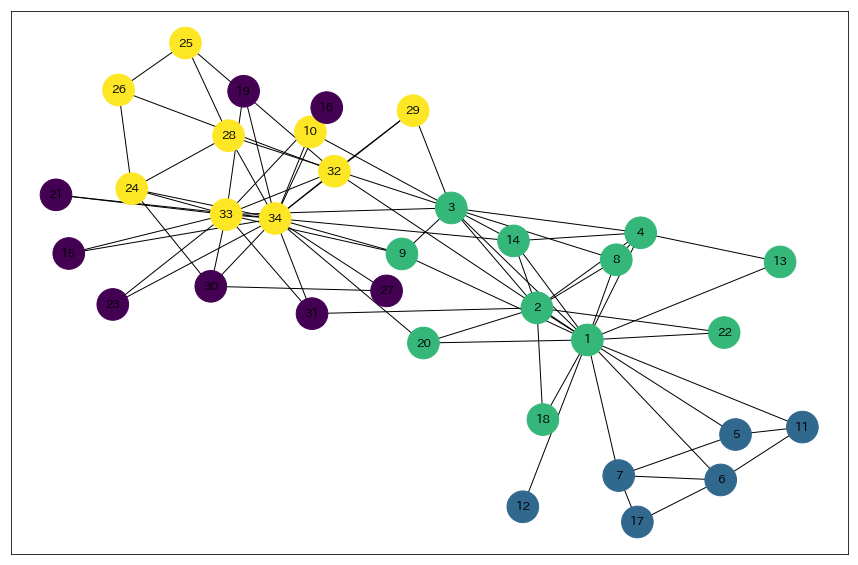

In [7]:
# ラベルごとに色を変えて可視化
plt.figure(figsize=(15,10))
pos=nx.spring_layout(G, k=0.5) 
nx.draw_networkx_edges(G, pos, random_state=18)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=list(node_label_dict_sorted.values()), random_state=888)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', random_state=0)
plt.show()

### 上記では，embファイルを出力させたが，ランダムウォークを出力させることも可能
- -owの引数を加えればいい
- これの何がいいかというと，node2vecはword2vecの学習部分よりも，ランダムウォーク部分の方が時間がかかる
- なので，例えばC++実装でランダムウォークだけ作成して，python版でword2vecで学習させるというやり方もある

In [8]:
!mkdir walk

mkdir: walk: File exists


In [9]:
!./node2vec -i:graph/karate.edgelist -o:walk/karate.walk -l:10 -r:30 -d:64 -p:1 -q:1 -v -ow


An algorithmic framework for representational learning on graphs. [Mar  7 2019]
Input graph path (-i:)=graph/karate.edgelist
Output graph path (-o:)=walk/karate.walk
Number of dimensions. Default is 128 (-d:)=64
Length of walk per source. Default is 80 (-l:)=10
Number of walks per source. Default is 10 (-r:)=30
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=NO
Graph is weighted. (-w)=NO
Output random walks instead of embeddings. (-ow)=YES
Read 78 lines from graph/karate.edgelist
Preprocessing progress: 0.00% 
Walking Progress: 0.00%


#### 今出来たファイルは，各列が1回のランダムウォークの結果となっている
- つまり，今は各ノードからの1回のウォークを10回としているので，10列
- それで，各ノードごとのウォークを30回なので，ノード数34だと，34*30=1020行となる

In [10]:
df = pd.read_csv('./walk/karate.walk', header=None, sep=' ')
print(df.shape)
df

(1020, 10)


,0,1,2,3,4,5,6,7,8,9
0,23,34,19,33,9,3,9,33,34,28
1,24,30,24,26,32,33,34,28,3,33
2,14,1,8,4,13,1,7,1,9,3
3,25,32,25,28,25,26,32,29,32,34
4,29,3,8,1,6,17,7,1,22,2
5,2,8,1,18,2,31,34,14,1,3
6,18,2,3,10,34,33,30,24,28,34
7,5,11,6,1,5,11,6,7,5,11
8,32,26,24,34,24,33,19,33,23,34
9,22,2,31,2,18,2,14,4,8,4
